<a href="https://colab.research.google.com/github/Monika0818-senthil/SCT_DS_2/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
   survived  pclass     sex        age  sibsp  parch   fare    embarked
0         0       3    male  34.784584      1      2  61.12   Cherbourg
1         1       1  female  56.266392      0      1  92.39   Cherbourg
2         1       1    male        NaN      0      1  13.06  Queenstown
3         0       3    male  21.923349      0      2  72.77  Queenstown
4         0       3  female  17.422195      0      0  36.76  Queenstown

Missing Values Before Cleaning:
survived     0
pclass       0
sex          0
age         20
sibsp        0
parch        0
fare         0
embarked    10
dtype: int64

Missing Values After Cleaning:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


/tmp/ipython-input-553448465.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-553448465.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

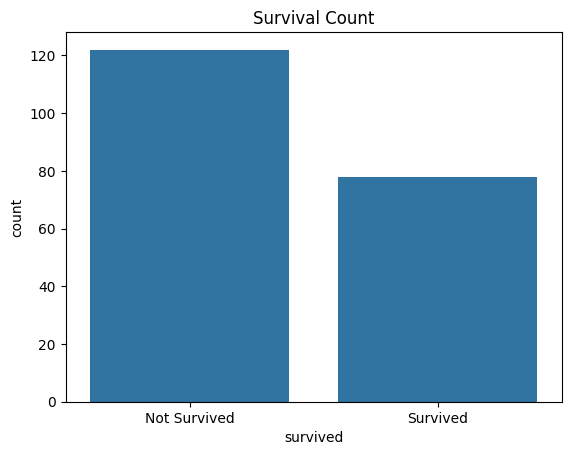

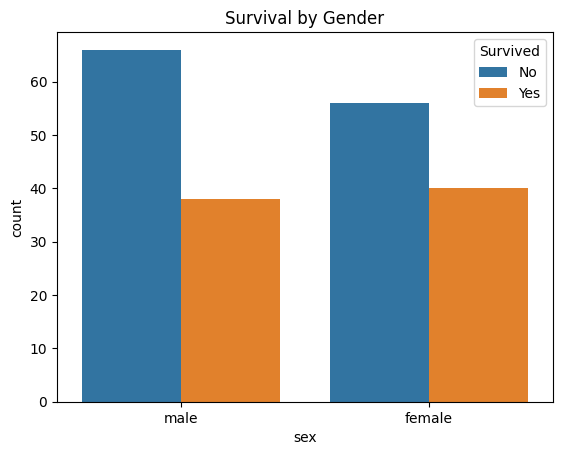

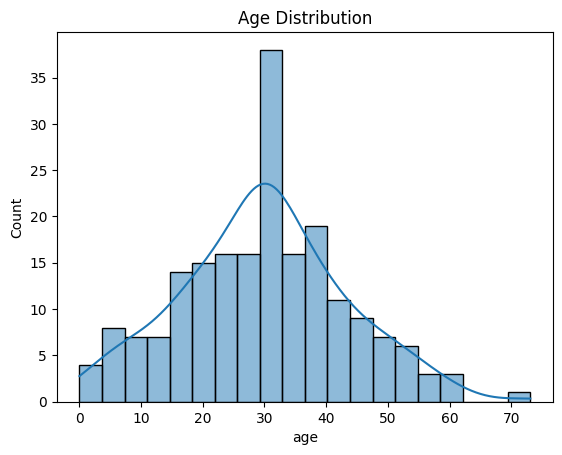

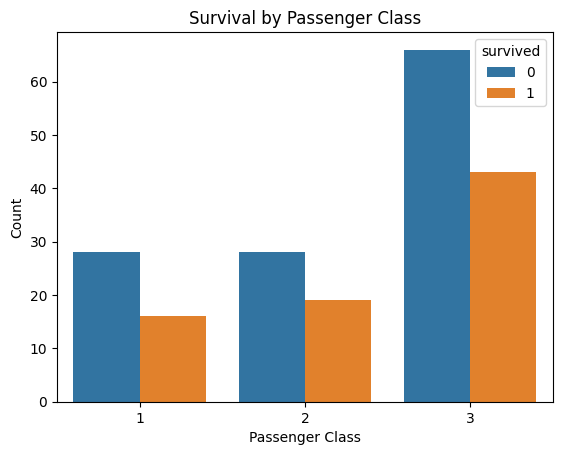

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Create Fake Titanic Dataset
# ---------------------------
np.random.seed(42)

n = 200  # Number of passengers
df = pd.DataFrame({
    'survived': np.random.choice([0, 1], size=n, p=[0.6, 0.4]),
    'pclass': np.random.choice([1, 2, 3], size=n, p=[0.2, 0.3, 0.5]),
    'sex': np.random.choice(['male', 'female'], size=n),
    'age': np.random.normal(30, 14, size=n).clip(0, 80),
    'sibsp': np.random.randint(0, 3, size=n),
    'parch': np.random.randint(0, 3, size=n),
    'fare': np.random.uniform(10, 100, size=n).round(2),
    'embarked': np.random.choice(['Southampton', 'Cherbourg', 'Queenstown'], size=n),
})

# Introduce some missing values
df.loc[df.sample(frac=0.1).index, 'age'] = np.nan
df.loc[df.sample(frac=0.05).index, 'embarked'] = np.nan

print("Sample Data:")
print(df.head())

# ---------------------------
# Step 2: Data Cleaning
# ---------------------------
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# ---------------------------
# Step 3: Exploratory Data Analysis
# ---------------------------

# Survival Count
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# Survival by Gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Age Distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Class vs Survival
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Embarked vs Survival
